# Types of Regression Algorithms

In this note book we will be talking about 6 types of regression Machine Learning algorithms in detail. Those six Algorithms are as follows,

    1. Simple Linear Regression
    2. Multiple Linear Regression
    3. Polynomial Regression
    4. Support Vector for Regression (SVR)
    5. Decision Tree Classification
    6. Random Forest Classification

## What is Regression used for...

As we learned there are mainly two type of ML Problems,

   * Predicting a Label(Classification)
   * Predicting a value(Regression)

So unlike in classification problems in regression problems what is done is model is trained on data and used to predict a value.

Ex: Predicting a price of a car when certain parameters and details are given.

## 1. Simple Linear Regression

This is the simplest algorithm hence the name. How this model(algorithm) works is that, it look at the training data its given `X_test, y_test` and try to draw a linear line that would best fit the all the data points.

<img alt="Simple Linear Regression Demostration" src="./images/simple_linear_regression.png" style="width:55%;height:auto"/>

Model draws a regression line, `y = b0 + b1*X` just as normal `y = mx + c`. Where,
   * b0 = constant (intercept)
   * b1 = this represent how unit change in X (independent variable) affect the values y (dependent variable)

As shown in the above figure, what the model does is it draws several regression lines and it take the sum as `SUM = Residuals**2` and store them. And pick the regression line with the __Minimum Sum__ as the final Regression Line.

In [1]:
# Simple Linear Regression Model

# Import the relavent modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# set a random seed globally
np.random.seed(42)

In [2]:
# lets preprocess our data

# import the data
data = pd.read_csv('data/Simple Linear Regression/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# now we have to check if there are any missing values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
# Okay no missing values then lets just see details of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# All numeric data type and we dont have to manipulate data

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


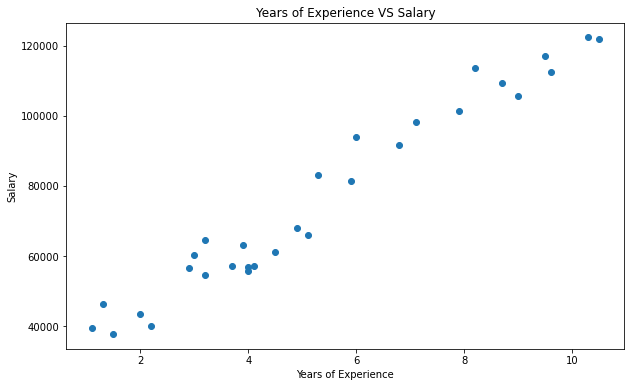

In [6]:
# Lets plot these and see
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(x=data['YearsExperience'],y=data['Salary'],cmap="winter", marker='o')
ax.set_title('Years of Experience VS Salary')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

In [7]:
# lets divide our data into X and y
X = data.drop('Salary',axis=1)
y = data['Salary']

# Lets split the data to train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)

In [8]:
len(X_train), len(X_test)

(20, 10)

In [9]:
# Now we can fit the data to our model

# Importing the simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train)

LinearRegression()

In [10]:
# Now lets see the score
model.score(X=X_test, y=y_test)

0.9553063138044949

In [11]:
# 95% Score.... Not bad

# lets see some predictions
y_pred = model.predict(X_test)

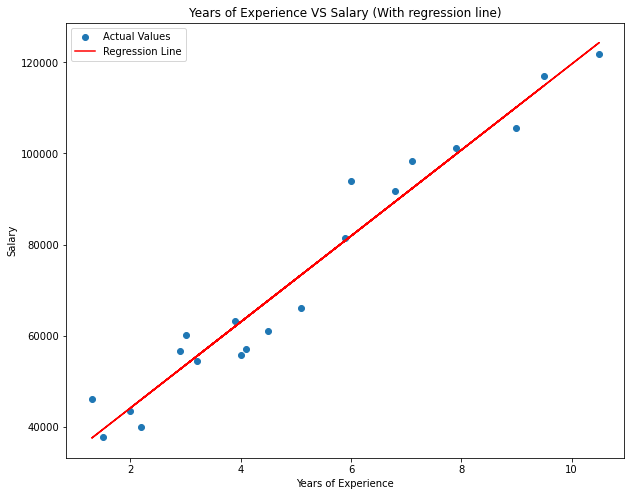

In [12]:
# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_train,y=y_train,cmap="winter", marker='o', label='Actual Values')
ax.plot(X_train,model.predict(X_train),color='red',label='Regression Line')
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

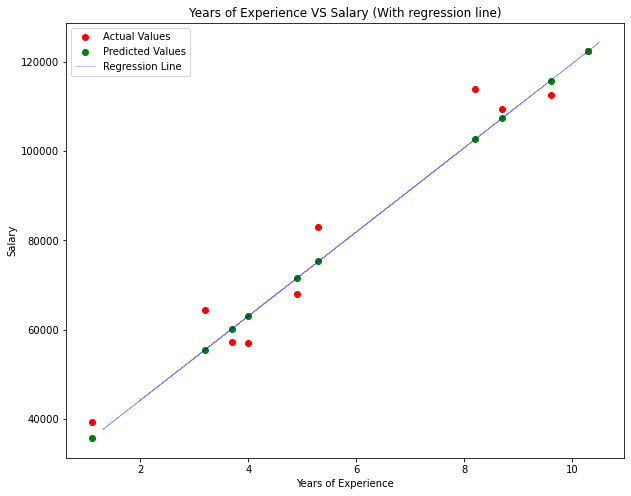

In [13]:
# lets see how well this model can predict new values

# So now we can plot the regression Line

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=X_test,y=y_test,cmap="winter", marker='o', label='Actual Values', color='red')
ax.scatter(x=X_test,y=y_pred,cmap="winter", marker='o', label='Predicted Values', color='green')
ax.plot(X_train,model.predict(X_train),color='blue',label='Regression Line',linewidth=0.5,alpha=0.5)
ax.legend()
ax.set_title('Years of Experience VS Salary (With regression line)')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary');

## 2. Multiple Linear Regresion

Here the intuition is as same as simple Linear Regression. But in Multiple linear regression the equation looks like this,

`y = b0 + b1.X1 + b2.X2 + ... + bn.Xn`

In [14]:
# Multiple linear regression

# importing the important modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# setting a global seed
np.random.seed(42)

In [15]:
# Preprocessing data

data = pd.read_csv('./data/Multiple Linear Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Lets see some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
# there is one categorical data we will have to take care of that
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [18]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

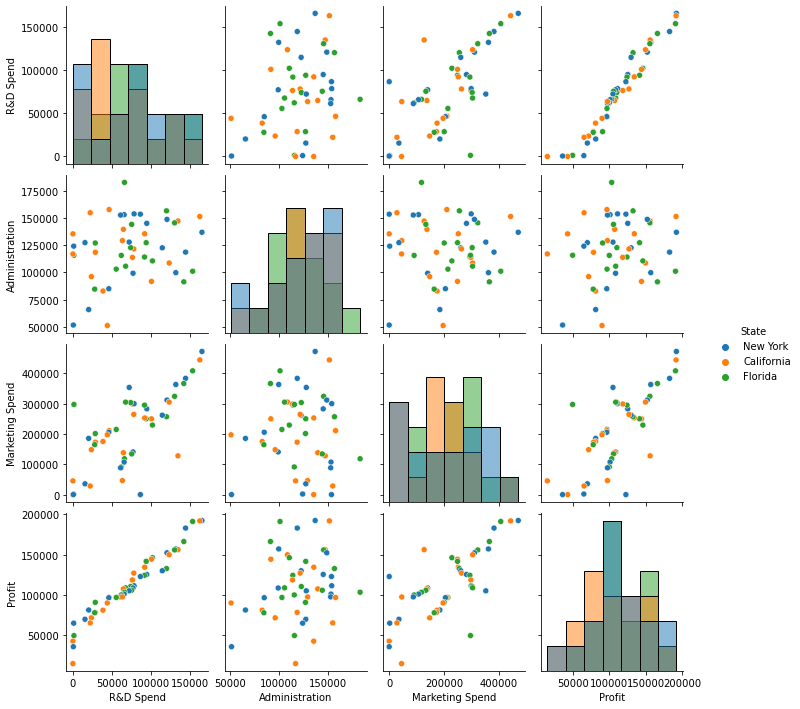

In [20]:
# no missing values that is good

# explore the dataset and we will see
import seaborn as sns

# we can see the correlation of each variable using
sns.pairplot(data,hue='State',diag_kind='hist');

In [21]:
#It seams that R&D, Marketting spend and profit has the most correlation

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
# we have to convert this to a numerical variable
# Lets import relavent modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# First create a instance of OneHotencoder
one_hot = OneHotEncoder()


# and define an array with the fetures/attributes of the dataframe we want to be converted
categorical_features =['State']

# Define a column transformer to transform the columns and combine everything
# what this says is transform the colums mentioned in 'categorical_fetures' using
# the transformer one_hot which is named as 'one_hot' let other columns passthrough and include in the final
transformer = ColumnTransformer(transformers=[('one_hot',one_hot,categorical_features)],remainder='passthrough')

# now that we have a transformer ready to transform all we have to do is give it the data
transformed_data = transformer.fit_transform(data)
transformed_df =pd.DataFrame(transformed_data)
transformed_df.head()

,0,1,2,3,4,5,6
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [23]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
# we have to drop one column in order to get rid of dummy column in order to avoid "dummy variable trap"
transformed_df.drop(2,axis=1,inplace=True)

In [26]:
transformed_df.head()

,0,1,3,4,5,6
0,0.0,0.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,142107.34,91391.77,366168.42,166187.94


In [27]:
# now we cansplit the data
X = transformed_df.drop(6, axis=1)
y = transformed_df[6]

In [28]:
# lets split the data into train test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
len(X_train),len(X_test)

(40, 10)

In [30]:
# Now we can fit this to a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train,y=y_train);

In [31]:
# Now that model is trained we can see how it has done
model.score(X_test,y_test)

0.8987266414319358

In [32]:
# 89% not good but not bad as well


In __multiple linear regression__ there are ways we can use our independent variables.

* All in - Where we use all of the independent variables
* Backward elimination - Where we consider "P value" s of each attribute and get rid of the once higher than tha significance value
* Forward selection
* Bidirectional Elimination
* Score comparison
